In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cv_master import Grid2DKernel, SatelliteImageData

sns.set_style('whitegrid')

In [2]:
# creating the splitting kernel 55 x 55 pixels
kernel = Grid2DKernel(55, 55)

# read in the image data that only the first 2
image = SatelliteImageData(kernel, images=['imagem1.txt', 'imagem2.txt'])

In [3]:
# Prepare the generator for train validate test
gen = image.iter_train_validate_test()

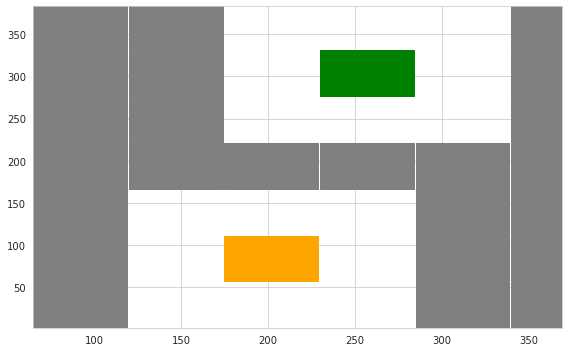

In [12]:
# get the patches for each split
train, val, test = next(gen)

# plotting the train, validate, test patchs, and patches that are ignored
# Green = Test
# Orange = Validate
# Grey = Train
# White = Ignored
fig, ax = plt.subplots(figsize=(8, 5))
for patch in train:
    ax.add_patch(patch.to_matplotlib(color='grey'))

ax.add_patch(val.to_matplotlib(color='orange'))
ax.add_patch(test.to_matplotlib(color='green'))

ax.set_xlim(*image.grid._patch.x_bound)
ax.set_ylim(*image.grid._patch.y_bound)

fig.tight_layout()
fig.show()

In [13]:
# to read the data, just pass in the patch or set of patches to the image object
image.get_data_patches(train)

,y,x,label,ndai,sd,corr,ra_df,ra_cf,ra_bf,ra_af,ra_an,image
104197,167.0,340.0,-1.0,-1.208989,1.143470,0.173379,289.69800,274.28760,254.22208,229.78316,210.85913,0
104095,167.0,340.0,-1.0,-0.903595,0.498905,0.167016,302.08603,290.27597,271.56870,242.52521,215.77678,1
104198,168.0,340.0,-1.0,-1.043220,1.392358,0.173226,288.72748,277.65674,254.98549,229.93246,211.30707,0
104096,168.0,340.0,-1.0,-0.797827,0.738547,0.165826,301.65497,291.14777,272.49829,242.06764,216.12115,1
104199,169.0,340.0,-1.0,-1.156559,1.418547,0.171332,290.39639,280.40939,255.92952,230.11308,211.62976,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115172,327.0,369.0,-1.0,-0.907434,1.876930,0.129043,299.76691,293.47894,273.56512,249.72105,231.00896,1
115173,328.0,369.0,-1.0,-0.848684,1.462758,0.126807,298.64465,292.87930,270.37180,249.21773,231.40149,1
115174,329.0,369.0,-1.0,-0.899032,1.151548,0.127210,298.17505,289.40179,266.40781,250.41463,231.11732,1
115175,330.0,369.0,-1.0,-1.108019,0.986373,0.125885,298.70004,282.40100,266.51859,251.72713,231.43521,1


In [14]:
image.get_data_patch(val)

,y,x,label,ndai,sd,corr,ra_df,ra_cf,ra_bf,ra_af,ra_an,image
41057,57.0,175.0,1.0,1.612006,8.241781,0.614804,286.19159,209.38287,141.248670,79.660088,66.727783,0
40955,57.0,175.0,-1.0,2.304236,16.760717,0.470613,158.78313,152.73602,107.041890,73.714119,60.553032,1
41058,58.0,175.0,1.0,1.687607,9.646777,0.624138,285.60156,211.57196,131.526570,76.695526,66.949341,0
40956,58.0,175.0,-1.0,2.242145,15.025767,0.390743,157.58383,155.80412,99.764153,76.644958,69.552658,1
41059,59.0,175.0,1.0,1.777992,8.621158,0.608134,277.88312,213.04341,123.560070,77.398743,66.376183,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61635,109.0,229.0,0.0,1.666748,7.746150,0.158422,281.26431,265.65402,244.516830,217.679290,207.362350,1
61738,110.0,229.0,0.0,2.644987,5.626339,0.214451,340.72400,299.80060,247.399510,220.641430,229.171450,0
61636,110.0,229.0,0.0,1.890968,4.403193,0.166826,287.26807,257.67310,240.786440,219.064030,204.662700,1
61739,111.0,229.0,0.0,2.687667,4.239107,0.233495,340.43500,301.56586,255.089050,243.840100,219.832260,0
